<a href="https://colab.research.google.com/github/hamagami/is2024/blob/main/is02_normaleq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression using the normal equation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!wget https://gist.githubusercontent.com/wmeints/80c1ba22ceeb7a29a0e5e979f0b0afba/raw/8629fe51f0e7642fc5e05567130807b02a93af5e/auto-mpg.csv

--2024-10-12 11:29:00--  https://gist.githubusercontent.com/wmeints/80c1ba22ceeb7a29a0e5e979f0b0afba/raw/8629fe51f0e7642fc5e05567130807b02a93af5e/auto-mpg.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17732 (17K) [text/plain]
Saving to: ‘auto-mpg.csv’

auto-mpg.csv        100%[===================>]  17.32K  --.-KB/s    in 0s      

2024-10-12 11:29:01 (86.1 MB/s) - ‘auto-mpg.csv’ saved [17732/17732]



In [4]:
# Load the dataset from the uploaded file
file_path = 'auto-mpg.csv'
auto_mpg = pd.read_csv(file_path)

In [5]:
# Clean the data: convert horsepower to numeric and drop any rows with missing values
auto_mpg['horsepower'] = pd.to_numeric(auto_mpg['horsepower'], errors='coerce')
auto_mpg_clean = auto_mpg.dropna(subset=['horsepower', 'mpg'])
auto_mpg_clean.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [6]:
# Redefine X (horsepower) and y (MPG)
X = auto_mpg_clean[['horsepower']].values
y = auto_mpg_clean['mpg'].values
len(X)

392

In [7]:
# Preparing the data for the normal equation approach
X_normal = np.c_[np.ones(X.shape[0]), X]  # Add a column of ones for the intercept term

# Compute the normal equation
beta = np.linalg.inv(X_normal.T.dot(X_normal)).dot(X_normal.T).dot(y)
# Print the resulting coefficients
print(f"Intercept: {beta[0]}")
print(f"Slope: {beta[1]}")

Intercept: 39.9358610211705
Slope: -0.15784473335365387


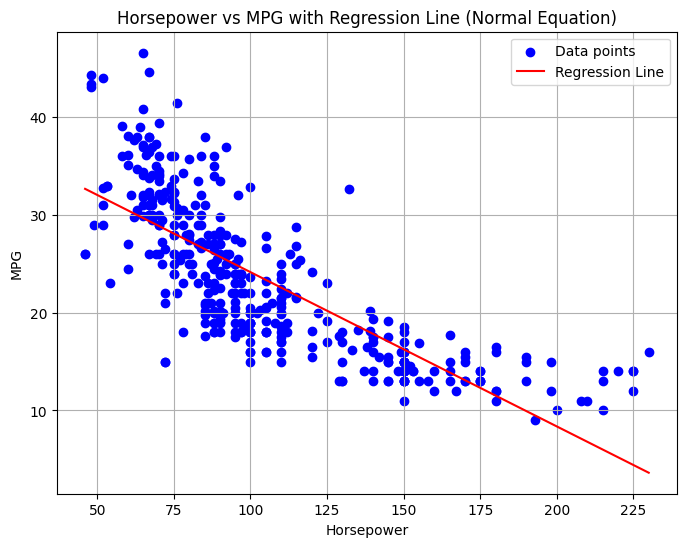

In [8]:


# Use the calculated theta to plot the regression line
# Define the x range for the plot (based on horsepower values)
x_range = np.linspace(X.min(), X.max(), 100)

# Predict the corresponding y values (MPG) using the linear regression model
y_pred = beta[0] + beta[1] * x_range

# Plot the data points and the regression line
plt.figure(figsize=(8,6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(x_range, y_pred, color='red', label='Regression Line')
plt.title('Horsepower vs MPG with Regression Line (Normal Equation)')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.grid(True)
plt.legend()
plt.show()


In [22]:
# Drop rows with missing values in 'horsepower', 'weight', or 'mpg'
df_clean = auto_mpg.dropna(subset=['horsepower', 'weight', 'mpg'])

# Redefine X (horsepower and weight) and y (MPG)
X = df_clean[['horsepower', 'weight']].values
y = df_clean['mpg'].values

# Preparing the data for the normal equation approach
X_normal = np.c_[np.ones(X.shape[0]), X]  # Add a column of ones for the intercept term

# Compute the normal equation: theta = (X^T * X)^(-1) * X^T * y
theta = np.linalg.inv(X_normal.T.dot(X_normal)).dot(X_normal.T).dot(y)

# Print the resulting coefficients
print(f"Intercept: {theta[0]}")
print(f"Coefficient for Horsepower: {theta[1]}")
print(f"Coefficient for Weight: {theta[2]}")



Intercept: 45.64021084017713
Coefficient for Horsepower: -0.04730286308619171
Coefficient for Weight: -0.005794157364802949


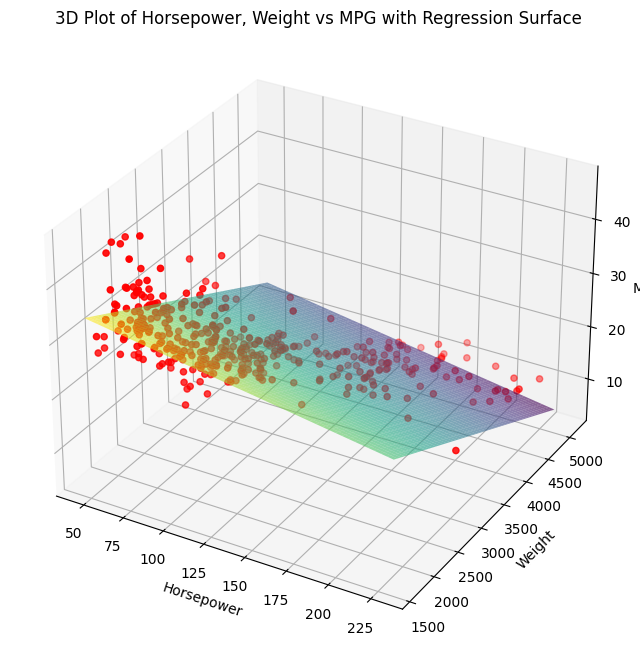

In [23]:
# Use the calculated theta to predict values for MPG
def predict(horsepower, weight):
    return theta[0] + theta[1] * horsepower + theta[2] * weight

# Define the range for horsepower and weight
horsepower_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 50)
weight_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 50)
horsepower_grid, weight_grid = np.meshgrid(horsepower_range, weight_range)

# Predict MPG values based on the regression model
mpg_pred = predict(horsepower_grid, weight_grid)

# Plotting the 3D surface plot for the regression result
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(horsepower_grid, weight_grid, mpg_pred, cmap='viridis', alpha=0.6)

# Scatter the original data points
ax.scatter(X[:, 0], X[:, 1], y, color='red', label='Data points')

# Labels
ax.set_title('3D Plot of Horsepower, Weight vs MPG with Regression Surface')
ax.set_xlabel('Horsepower')
ax.set_ylabel('Weight')
ax.set_zlabel('MPG')

plt.show()

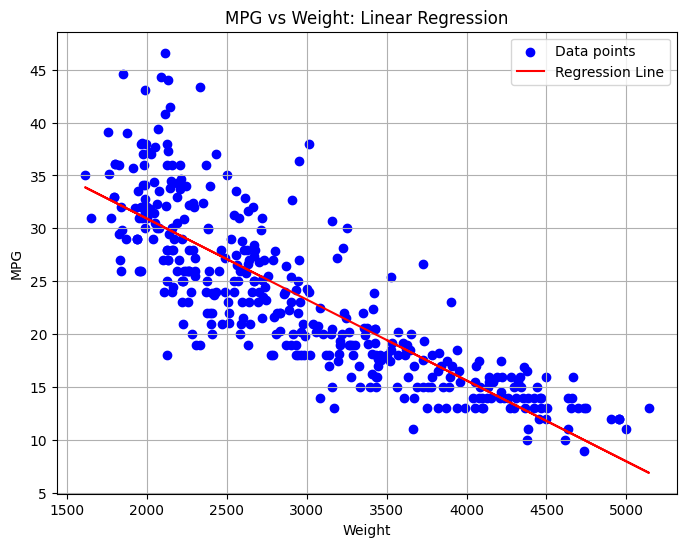

Slope (Coefficient for Weight): -0.007647342535779579
Intercept: 46.21652454901758


In [25]:
from sklearn.linear_model import LinearRegression
# Define X (Weight) and y (MPG)
X = df_clean['weight'].values.reshape(-1, 1)  # Reshape for sklearn compatibility
y = df_clean['mpg'].values

# Perform linear regression
model = LinearRegression()
model.fit(X, y)

# Predicted values
y_pred = model.predict(X)

# Plotting the regression line with the data points
plt.figure(figsize=(8,6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.title('MPG vs Weight: Linear Regression')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.legend()
plt.grid(True)
plt.show()

# Print the coefficients
print(f"Slope (Coefficient for Weight): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")